In [45]:
# Import required libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [46]:
data = pd.read_csv('wine vintge.csv')
print(data.head(5))
print('\n')
print(data.tail(5))
print('\n')
print(data.shape)

   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols   Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28              2.29             5.64  1.04   
1        2.76                  0.26              1.28             4.38  1.05   
2        3.24                  0.30              2.81             5.68  1.03   
3        3.49                  0.24              2.18             7.80  0.86   
4        2.69                  0.39              1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline  variety  
0   

In [47]:
class_names = ['Vinyard #1' , 'Vinyard #2', 'Vinyard #3']

In [48]:
transpose = data.describe().transpose()
print(transpose)

                              count        mean         std     min       25%  \
Alcohol                       178.0   13.000618    0.811827   11.03   12.3625   
Malic acid                    178.0    2.336348    1.117146    0.74    1.6025   
Ash                           178.0    2.366517    0.274344    1.36    2.2100   
Alcalinity of ash             178.0   19.494944    3.339564   10.60   17.2000   
Magnesium                     178.0   99.741573   14.282484   70.00   88.0000   
Total phenols                 178.0    2.295112    0.625851    0.98    1.7425   
Flavanoids                    178.0    2.029270    0.998859    0.34    1.2050   
Nonflavanoid phenols          178.0    0.361854    0.124453    0.13    0.2700   
 Proanthocyanins              178.0    1.590899    0.572359    0.41    1.2500   
Color intensity               178.0    5.058090    2.318286    1.28    3.2200   
Hue                           178.0    0.957449    0.228572    0.48    0.7825   
OD280/OD315 of diluted wines

In [49]:

target_column = ['variety']
predictors = list(set(list(data.columns)) - set(target_column)) 
data[predictors] = data[predictors] / data[predictors].max()
predictors_transpose = data.describe().transpose()
print(predictors_transpose)

                              count      mean       std       min       25%  \
Alcohol                       178.0  0.876643  0.054742  0.743763  0.833614   
Malic acid                    178.0  0.402819  0.192611  0.127586  0.276293   
Ash                           178.0  0.732668  0.084936  0.421053  0.684211   
Alcalinity of ash             178.0  0.649831  0.111319  0.353333  0.573333   
Magnesium                     178.0  0.615689  0.088163  0.432099  0.543210   
Total phenols                 178.0  0.591524  0.161302  0.252577  0.449098   
Flavanoids                    178.0  0.399463  0.196626  0.066929  0.237205   
Nonflavanoid phenols          178.0  0.548264  0.188566  0.196970  0.409091   
 Proanthocyanins              178.0  0.444385  0.159877  0.114525  0.349162   
Color intensity               178.0  0.389084  0.178330  0.098462  0.247692   
Hue                           178.0  0.559912  0.133668  0.280702  0.457602   
OD280/OD315 of diluted wines  178.0  0.652921  0.177

In [50]:
#Creating the Training and Test Datasets

x = data[predictors].values
y = data[target_column].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)

print(x_train.shape)
print(x_test.shape)

(124, 13)
(54, 13)


In [51]:
#Building, Predicting, and Evaluating the Neural Network Model

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation = 'relu', solver ='adam', max_iter = 500)
mlp.fit(x_train, y_train)

predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

/home/sujit/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sujit/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [52]:
predicted = mlp.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

accuracyInpercentage = (accuracy * 100)
print('Accuracy :', accuracyInpercentage)

Accuracy : 100.0




Confusion matrix, without normalization
[[15  0  0]
 [ 0 20  0]
 [ 0  0 19]]


Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


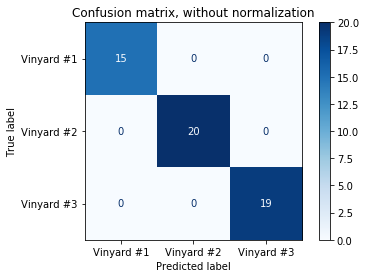

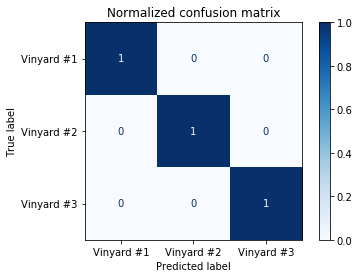

In [53]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(mlp, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print('\n')
    print(title)
    print(disp.confusion_matrix)

#plt.show()

In [54]:
print('\n')
print('Classification Report:')
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))



Classification Report:
[[44  0  0]
 [ 0 51  0]
 [ 0  0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        29

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124

